In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import random
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv('../data/clean/dataset.csv')

In [3]:
df[df.isna().any(axis=1)]

,name,url,title,lemmes,funny
18008,la_depeche,https://www.ladepeche.fr/2024/10/04/de-tout-un...,"De tout, un peu",NaN,0


In [4]:
df = df.fillna('')

In [5]:
df[df.isna().any(axis=1)]

,name,url,title,lemmes,funny


In [6]:
df

,name,url,title,lemmes,funny
0,le_monde,https://www.lemonde.fr/disparitions/article/20...,"Simon Fieschi, grièvement blessé pendant l’att...",simon fieschi grievement blesser attentat cont...,0
1,le_monde,https://www.lemonde.fr/idees/article/2024/10/1...,« Il faut expliquer la différence entre les ef...,falloir expliquer difference effet concret imm...,0
2,le_monde,https://www.lemonde.fr/economie/article/2024/1...,Le périphérique a désormais son outil évaluate...,peripherique outil evaluateur kilometre heure,0
3,le_monde,https://www.lemonde.fr/economie/article/2024/1...,"En Occitanie, les agriculteurs mécontents mult...",occitanie agriculteur mecontent multiplier act...,0
4,le_monde,https://www.lemonde.fr/les-decodeurs/article/2...,Présidentielle américaine 2024 : comment Donal...,presidentielle americain donald trump instrume...,0
...,...,...,...,...,...
106557,ouest_france,https://www.ouest-france.fr/pays-de-la-loire/t...,Le défi Foyers à alimentation positive d’Erd...,defi foyers alimentation positif erdre gesvre ...,0
106558,ouest_france,https://www.ouest-france.fr/sport/football/red...,"Football. Le propriétaire du Red Star, 777 Pa...",football proprietaire red star partners failli...,0
106559,ouest_france,https://www.ouest-france.fr/normandie/lisieux-...,"Plus d’un an après les émeutes à Lisieux, l...",an apres emeute lisieux poste police municipal...,0
106560,ouest_france,https://www.ouest-france.fr/bretagne/finistere...,Le Sud-Finistère célèbre la culture urbaine...,sud finistere celebre culture urbain etat,0


In [7]:
print(len(df))
print(len(df[df['funny'] == 0]))
print(len(df[df['funny'] == 0]) / len(df))
print(len(df[df['funny'] == 1]))
print(len(df[df['funny'] == 1]) / len(df))

106562
86795
0.8145023554362718
19767
0.18549764456372816


In [8]:
df['name'].unique()

array(['le_monde', 'la_depeche', 'actu_orange', 'huffpost',
       'franceinfotv', 'gorafisation', 'europe1', 'rfi', 'demotivateur',
       'le_parisien', 'liberation', 'ouest_france'], dtype=object)

In [9]:
df.groupby('name').size().reset_index(name='count').sort_values(by='count', ascending=False)

,name,count
8,le_parisien,17996
10,ouest_france,16704
6,la_depeche,16440
3,franceinfotv,14142
5,huffpost,10307
7,le_monde,8565
11,rfi,7247
9,liberation,5999
4,gorafisation,4477
1,demotivateur,2381


In [10]:
for name in df['name'].unique():
    print("{:<15} {:>5}    {:>.5f}".format(name, len(df[df['name'] == name]), len(df[df['name'] == name])/len(df)))





le_monde         8565    0.08038
la_depeche      16440    0.15428
actu_orange       600    0.00563
huffpost        10307    0.09672
franceinfotv    14142    0.13271
gorafisation     4477    0.04201
europe1          1704    0.01599
rfi              7247    0.06801
demotivateur     2381    0.02234
le_parisien     17996    0.16888
liberation       5999    0.05630
ouest_france    16704    0.15675


In [11]:
for index, row in df.groupby('name').size().reset_index(name='count').sort_values(by='count', ascending=False).iterrows():
    print("{:<15} {:>5}    {:>.5f}".format(row['name'], row['count'], row['count']/len(df)))


le_parisien     17996    0.16888
ouest_france    16704    0.15675
la_depeche      16440    0.15428
franceinfotv    14142    0.13271
huffpost        10307    0.09672
le_monde         8565    0.08038
rfi              7247    0.06801
liberation       5999    0.05630
gorafisation     4477    0.04201
demotivateur     2381    0.02234
europe1          1704    0.01599
actu_orange       600    0.00563


In [12]:
df['lemmes'][:10]

0    simon fieschi grievement blesser attentat cont...
1    falloir expliquer difference effet concret imm...
2        peripherique outil evaluateur kilometre heure
3    occitanie agriculteur mecontent multiplier act...
4    presidentielle americain donald trump instrume...
5    generalisation videosurveillance algorithmique...
6    barcelone coupe america succes excus renover p...
7    italie tribunal invalide retention migrant env...
8    direct budget depute continuer reecrire texte ...
9    fanzinarium paris memoire vif passionne period...
Name: lemmes, dtype: object

In [13]:
' '.join(list(df['lemmes'][:10])).split()

['simon',
 'fieschi',
 'grievement',
 'blesser',
 'attentat',
 'contre',
 'charlie',
 'hebdo',
 'mourir',
 'falloir',
 'expliquer',
 'difference',
 'effet',
 'concret',
 'immigration',
 'ressentir',
 'citoyen',
 'peripherique',
 'outil',
 'evaluateur',
 'kilometre',
 'heure',
 'occitanie',
 'agriculteur',
 'mecontent',
 'multiplier',
 'action',
 'an',
 'dernier',
 'mouvement',
 'presidentielle',
 'americain',
 'donald',
 'trump',
 'instrumentalise',
 'theorie',
 'complotiste',
 'campagne',
 'campagne',
 'generalisation',
 'videosurveillance',
 'algorithmique',
 'peser',
 'risque',
 'majeur',
 'liberte',
 'barcelone',
 'coupe',
 'america',
 'succes',
 'excus',
 'renover',
 'port',
 'arnaqu',
 'italie',
 'tribunal',
 'invalide',
 'retention',
 'migrant',
 'envoyer',
 'albanie',
 'direct',
 'budget',
 'depute',
 'continuer',
 'reecrire',
 'texte',
 'commission',
 'fanzinarium',
 'paris',
 'memoire',
 'vif',
 'passionne',
 'periodique',
 'amateur']

In [14]:
Counter(' '.join(list(df['lemmes'][:10])).split()).most_common(5)

[('campagne', 2),
 ('simon', 1),
 ('fieschi', 1),
 ('grievement', 1),
 ('blesser', 1)]

In [15]:
df.iloc[53620]

name                                           franceinfotv
url       https://www.francetvinfo.fr/meteo/meteo-france...
title       Bulletin météo du jeudi 10 octobre 2024 à 13h40
lemmes                         bulletin meteo jeudi octobre
funny                                                     0
Name: 53620, dtype: object

In [16]:
count_all = Counter(' '.join(list(df['lemmes'])).split()).most_common(50)
count_all

[('paris', 6943),
 ('jo', 5931),
 ('france', 4563),
 ('video', 4531),
 ('an', 4487),
 ('jeu', 2772),
 ('octobre', 2753),
 ('contre', 2589),
 ('nouveau', 2454),
 ('apres', 2286),
 ('mort', 2220),
 ('faire', 2030),
 ('etre', 1940),
 ('euro', 1921),
 ('guerre', 1804),
 ('grand', 1801),
 ('francais', 1740),
 ('monde', 1710),
 ('homme', 1681),
 ('vouloir', 1670),
 ('olympique', 1637),
 ('face', 1536),
 ('femme', 1529),
 ('paralympique', 1493),
 ('mettre', 1460),
 ('ministre', 1398),
 ('enfant', 1355),
 ('jour', 1343),
 ('gouvernement', 1297),
 ('football', 1289),
 ('jeune', 1273),
 ('vie', 1264),
 ('etat', 1247),
 ('prendre', 1214),
 ('americain', 1208),
 ('israel', 1201),
 ('heure', 1182),
 ('medaille', 1157),
 ('samedi', 1142),
 ('barnier', 1123),
 ('bleu', 1112),
 ('macron', 1102),
 ('michel', 1091),
 ('septembre', 1085),
 ('petit', 1077),
 ('temps', 1073),
 ('pays', 1042),
 ('prix', 1042),
 ('photos', 1020),
 ('devenir', 1013)]

In [17]:
{ k: v  for k, v in count_all}

{'paris': 6943,
 'jo': 5931,
 'france': 4563,
 'video': 4531,
 'an': 4487,
 'jeu': 2772,
 'octobre': 2753,
 'contre': 2589,
 'nouveau': 2454,
 'apres': 2286,
 'mort': 2220,
 'faire': 2030,
 'etre': 1940,
 'euro': 1921,
 'guerre': 1804,
 'grand': 1801,
 'francais': 1740,
 'monde': 1710,
 'homme': 1681,
 'vouloir': 1670,
 'olympique': 1637,
 'face': 1536,
 'femme': 1529,
 'paralympique': 1493,
 'mettre': 1460,
 'ministre': 1398,
 'enfant': 1355,
 'jour': 1343,
 'gouvernement': 1297,
 'football': 1289,
 'jeune': 1273,
 'vie': 1264,
 'etat': 1247,
 'prendre': 1214,
 'americain': 1208,
 'israel': 1201,
 'heure': 1182,
 'medaille': 1157,
 'samedi': 1142,
 'barnier': 1123,
 'bleu': 1112,
 'macron': 1102,
 'michel': 1091,
 'septembre': 1085,
 'petit': 1077,
 'temps': 1073,
 'pays': 1042,
 'prix': 1042,
 'photos': 1020,
 'devenir': 1013}

In [18]:
count_neg = Counter(' '.join(list(df[df['funny'] == 0]['lemmes'])).split()).most_common(50)
count_neg

[('paris', 6684),
 ('jo', 5865),
 ('france', 4304),
 ('an', 3426),
 ('octobre', 2750),
 ('jeu', 2612),
 ('contre', 2351),
 ('nouveau', 2227),
 ('mort', 2056),
 ('apres', 1848),
 ('video', 1813),
 ('guerre', 1751),
 ('francais', 1641),
 ('olympique', 1587),
 ('etre', 1541),
 ('grand', 1525),
 ('paralympique', 1492),
 ('faire', 1460),
 ('face', 1407),
 ('vouloir', 1372),
 ('ministre', 1296),
 ('euro', 1285),
 ('gouvernement', 1257),
 ('football', 1230),
 ('mettre', 1197),
 ('homme', 1183),
 ('israel', 1182),
 ('medaille', 1145),
 ('samedi', 1132),
 ('barnier', 1120),
 ('jour', 1092),
 ('septembre', 1075),
 ('jeune', 1069),
 ('bleu', 1068),
 ('vie', 1064),
 ('michel', 1061),
 ('femme', 1054),
 ('etat', 1047),
 ('monde', 1045),
 ('heure', 1011),
 ('americain', 984),
 ('ligue', 979),
 ('temps', 963),
 ('prix', 957),
 ('enfant', 955),
 ('pays', 938),
 ('equipe', 926),
 ('environ', 889),
 ('vendredi', 888),
 ('fete', 878)]

In [19]:
count_pos = Counter(' '.join(list(df[df['funny'] == 1]['lemmes'])).split()).most_common(50)
count_pos

[('video', 2718),
 ('an', 1061),
 ('photos', 1020),
 ('monde', 665),
 ('euro', 636),
 ('faire', 570),
 ('photo', 541),
 ('homme', 498),
 ('femme', 475),
 ('apres', 438),
 ('enfant', 400),
 ('etre', 399),
 ('plein', 399),
 ('chien', 385),
 ('petit', 377),
 ('prendre', 341),
 ('devenir', 319),
 ('avion', 311),
 ('vouloir', 298),
 ('voiture', 292),
 ('mariage', 291),
 ('bebe', 287),
 ('maison', 279),
 ('million', 279),
 ('chat', 278),
 ('retrouver', 276),
 ('grand', 276),
 ('internaute', 273),
 ('mettre', 263),
 ('paris', 259),
 ('france', 259),
 ('ete', 257),
 ('jour', 251),
 ('trump', 250),
 ('fille', 246),
 ('grace', 245),
 ('contre', 238),
 ('macron', 228),
 ('nouveau', 227),
 ('police', 225),
 ('vendre', 225),
 ('americain', 224),
 ('cause', 220),
 ('decouvrir', 219),
 ('noel', 219),
 ('passer', 217),
 ('record', 214),
 ('couple', 212),
 ('insolite', 210),
 ('star', 206)]

In [20]:
def make_wordcloud(count):
    cloud = WordCloud(background_color = 'white').generate_from_frequencies({ k: v for (k, v) in count})
    plt.imshow(cloud.recolor(color_func=lambda *args, **kwargs: "rgb(0, 100, {})".format(random.randint(100, 255))))
    plt.axis("off")
    plt.show();

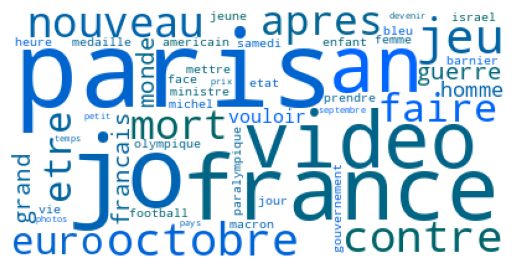

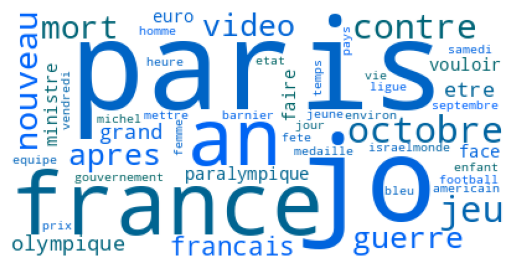

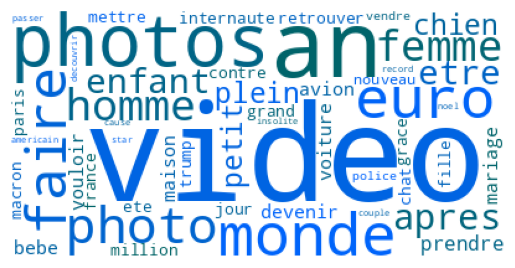

In [21]:
make_wordcloud(count_all)
make_wordcloud(count_neg)
make_wordcloud(count_pos)

In [22]:
' '.join(list(df[df['funny'] == 0]['lemmes'])).split().count('photos')

0

In [23]:
' '.join(list(df[df['funny'] == 0]['lemmes'])).split().count('photo')

195

In [24]:
freq_all = list(map(lambda x: (x[0], x[1] / len(df)), count_all))
freq_all

[('paris', 0.06515455790994913),
 ('jo', 0.05565773915654736),
 ('france', 0.042820142264597134),
 ('video', 0.04251984760045795),
 ('an', 0.042106942437266565),
 ('jeu', 0.026013025281057037),
 ('octobre', 0.025834725324224397),
 ('contre', 0.024295715170511063),
 ('nouveau', 0.02302884705617387),
 ('apres', 0.021452300069443143),
 ('mort', 0.02083294232465607),
 ('faire', 0.01904994275632965),
 ('etre', 0.018205364013438186),
 ('euro', 0.018027064056605546),
 ('guerre', 0.016929111690846644),
 ('grand', 0.016900959066083594),
 ('francais', 0.01632852236256827),
 ('monde', 0.016046996114937782),
 ('homme', 0.015774854075561645),
 ('vouloir', 0.0156716277847638),
 ('olympique', 0.015361948912370263),
 ('face', 0.014414143878680955),
 ('femme', 0.014348454420900509),
 ('paralympique', 0.014010622923743924),
 ('mettre', 0.013700944051350387),
 ('ministre', 0.013119123139580713),
 ('enfant', 0.012715602184643682),
 ('jour', 0.012602991685591487),
 ('gouvernement', 0.012171318105891405),
 

In [25]:
# Function to calculate lemma frequencies
def calculate_lemma_frequencies(df):
    # Separate positive and negative classes
    positive_data = df[df['funny'] == 1]['lemmes']
    negative_data = df[df['funny'] == 0]['lemmes']
    
    # Calculate overall frequency
    all_lemmas = ' '.join(df['lemmes']).split()
    count_all = Counter(all_lemmas)
    words = list(count_all.keys())
    
    # Calculate frequency in positive and negative classes
    positive_lemmas = ' '.join(positive_data).split()
    negative_lemmas = ' '.join(negative_data).split()
    count_pos = Counter(positive_lemmas)
    count_neg = Counter(negative_lemmas)

    total_count = len(df)
    total_pos = len(positive_data)
    total_neg = len(negative_data)
    
    comparison_data = []

    for lemma in words:
        overall = count_all[lemma]
        pos = count_pos[lemma]
        neg = count_neg[lemma]

        overall_freq = overall / total_count
        pos_freq = pos / total_pos
        neg_freq = neg / total_neg

        odds_ratio = (pos * total_neg) / (neg * total_pos) if neg != 0 and pos != 0 else None

        contingency_table = [
            [count_pos[lemma], total_pos - count_pos[lemma]],
            [count_neg[lemma], total_neg - count_neg[lemma]]
        ]
        chi2, p, _, _ = chi2_contingency(contingency_table)
        
        # Create a DataFrame to show frequencies
        comparison_data.append({
            'Lemma': lemma,
            'Overall_Frequency': overall_freq,
            'Negative_Frequency': neg_freq,
            'Positive_Frequency': pos_freq,
            'prop_diff_negative': neg_freq - overall_freq,
            'prop_diff_positive': pos_freq - overall_freq,
            'odds_ratio': odds_ratio,
            'p': p,
        })

    lemma_freq_df = pd.DataFrame(comparison_data)
    
    return lemma_freq_df

# Calculate and display lemma frequencies
lemma_frequencies = calculate_lemma_frequencies(df)
lemma_frequencies[:50]


,Lemma,Overall_Frequency,Negative_Frequency,Positive_Frequency,prop_diff_negative,prop_diff_positive,odds_ratio,p
0,simon,0.000723,0.000841,0.000202,1.184782e-04,-0.000520,0.240597,4.113258e-03
1,fieschi,0.000056,0.000069,0.000000,1.282316e-05,-0.000056,NaN,5.196852e-01
2,grievement,0.000535,0.000657,0.000000,1.218200e-04,-0.000535,NaN,5.958260e-04
3,blesser,0.001126,0.001313,0.000304,1.873347e-04,-0.000823,0.231100,2.128258e-04
4,attentat,0.001764,0.001982,0.000809,2.174498e-04,-0.000955,0.408456,5.595434e-04
5,contre,0.024296,0.027087,0.012040,2.791099e-03,-0.012255,0.444507,3.585595e-35
6,charlie,0.000507,0.000449,0.000759,-5.741261e-05,0.000252,1.688809,1.164326e-01
7,hebdo,0.000357,0.000403,0.000152,4.664912e-05,-0.000205,0.376363,1.385064e-01
8,mourir,0.005809,0.005968,0.005110,1.592608e-04,-0.000699,0.856142,1.670697e-01
9,falloir,0.007817,0.008837,0.003339,1.019869e-03,-0.004478,0.377835,3.360906e-15


In [26]:
lemma_frequencies.sort_values(by='Overall_Frequency', ascending=False).reset_index(drop=True)[:50]

,Lemma,Overall_Frequency,Negative_Frequency,Positive_Frequency,prop_diff_negative,prop_diff_positive,odds_ratio,p
0,paris,0.065155,0.077009,0.013103,1.185449e-02,-0.052052,0.170144,1.565375e-236
1,jo,0.055658,0.067573,0.003339,1.191528e-02,-0.052319,0.049412,1.464866e-276
2,france,0.042820,0.049588,0.013103,6.767968e-03,-0.029717,0.264230,1.534295e-115
3,video,0.042520,0.020888,0.137502,-2.163155e-02,0.094982,6.582723,0.000000e+00
4,an,0.042107,0.039472,0.053675,-2.634623e-03,0.011568,1.359822,3.432474e-19
5,jeu,0.026013,0.030094,0.008094,4.080874e-03,-0.017919,0.268968,1.152168e-68
6,octobre,0.025835,0.031684,0.000152,5.849127e-03,-0.025683,0.004790,4.486957e-140
7,contre,0.024296,0.027087,0.012040,2.791099e-03,-0.012255,0.444507,3.585595e-35
8,nouveau,0.023029,0.025658,0.011484,2.629313e-03,-0.011545,0.447569,5.459105e-33
9,apres,0.021452,0.021292,0.022158,-1.607510e-04,0.000706,1.040701,4.643293e-01


In [27]:
lemma_frequencies.sort_values(by='Negative_Frequency', ascending=False).reset_index(drop=True)[:50]

,Lemma,Overall_Frequency,Negative_Frequency,Positive_Frequency,prop_diff_negative,prop_diff_positive,odds_ratio,p
0,paris,0.065155,0.077009,0.013103,1.185449e-02,-0.052052,0.170144,1.565375e-236
1,jo,0.055658,0.067573,0.003339,1.191528e-02,-0.052319,0.049412,1.464866e-276
2,france,0.042820,0.049588,0.013103,6.767968e-03,-0.029717,0.264230,1.534295e-115
3,an,0.042107,0.039472,0.053675,-2.634623e-03,0.011568,1.359822,3.432474e-19
4,octobre,0.025835,0.031684,0.000152,5.849127e-03,-0.025683,0.004790,4.486957e-140
5,jeu,0.026013,0.030094,0.008094,4.080874e-03,-0.017919,0.268968,1.152168e-68
6,contre,0.024296,0.027087,0.012040,2.791099e-03,-0.012255,0.444507,3.585595e-35
7,nouveau,0.023029,0.025658,0.011484,2.629313e-03,-0.011545,0.447569,5.459105e-33
8,mort,0.020833,0.023688,0.008297,2.855058e-03,-0.012536,0.350247,2.126370e-42
9,apres,0.021452,0.021292,0.022158,-1.607510e-04,0.000706,1.040701,4.643293e-01


In [28]:
lemma_frequencies.sort_values(by='Positive_Frequency', ascending=False).reset_index(drop=True)[:50]

,Lemma,Overall_Frequency,Negative_Frequency,Positive_Frequency,prop_diff_negative,prop_diff_positive,odds_ratio,p
0,video,0.042520,0.020888,0.137502,-2.163155e-02,0.094982,6.582723,0.000000e+00
1,an,0.042107,0.039472,0.053675,-2.634623e-03,0.011568,1.359822,3.432474e-19
2,photos,0.009572,0.000000,0.051601,-9.571892e-03,0.042029,NaN,0.000000e+00
3,monde,0.016047,0.012040,0.033642,-4.007132e-03,0.017595,2.794212,3.417804e-105
4,euro,0.018027,0.014805,0.032175,-3.222064e-03,0.014148,2.173241,2.029709e-61
5,faire,0.019050,0.016821,0.028836,-2.228697e-03,0.009786,1.714257,9.659449e-29
6,photo,0.006907,0.002247,0.027369,-4.660104e-03,0.020462,12.181944,0.000000e+00
7,homme,0.015775,0.013630,0.025194,-2.145037e-03,0.009419,1.848411,7.583763e-32
8,femme,0.014348,0.012144,0.024030,-2.204898e-03,0.009681,1.978823,1.128888e-36
9,apres,0.021452,0.021292,0.022158,-1.607510e-04,0.000706,1.040701,4.643293e-01


In [29]:
lemma_frequencies.sort_values(by='prop_diff_negative', ascending=False).reset_index(drop=True)[:50]

,Lemma,Overall_Frequency,Negative_Frequency,Positive_Frequency,prop_diff_negative,prop_diff_positive,odds_ratio,p
0,jo,0.055658,0.067573,0.003339,0.011915,-0.052319,0.049412,1.464866e-276
1,paris,0.065155,0.077009,0.013103,0.011854,-0.052052,0.170144,1.565375e-236
2,france,0.042820,0.049588,0.013103,0.006768,-0.029717,0.264230,1.534295e-115
3,octobre,0.025835,0.031684,0.000152,0.005849,-0.025683,0.004790,4.486957e-140
4,jeu,0.026013,0.030094,0.008094,0.004081,-0.017919,0.268968,1.152168e-68
5,guerre,0.016929,0.020174,0.002681,0.003245,-0.014248,0.132906,4.096667e-66
6,paralympique,0.014011,0.017190,0.000051,0.003179,-0.013960,0.002943,3.625584e-76
7,olympique,0.015362,0.018284,0.002529,0.002923,-0.012832,0.138340,3.499495e-59
8,mort,0.020833,0.023688,0.008297,0.002855,-0.012536,0.350247,2.126370e-42
9,contre,0.024296,0.027087,0.012040,0.002791,-0.012255,0.444507,3.585595e-35


In [30]:
lemma_frequencies.sort_values(by='prop_diff_positive', ascending=False).reset_index(drop=True)[:50]

,Lemma,Overall_Frequency,Negative_Frequency,Positive_Frequency,prop_diff_negative,prop_diff_positive,odds_ratio,p
0,video,0.042520,0.020888,0.137502,-0.021632,0.094982,6.582723,0.000000e+00
1,photos,0.009572,0.000000,0.051601,-0.009572,0.042029,NaN,0.000000e+00
2,photo,0.006907,0.002247,0.027369,-0.004660,0.020462,12.181944,0.000000e+00
3,monde,0.016047,0.012040,0.033642,-0.004007,0.017595,2.794212,3.417804e-105
4,euro,0.018027,0.014805,0.032175,-0.003222,0.014148,2.173241,2.029709e-61
5,chien,0.005706,0.002569,0.019477,-0.003136,0.013771,7.580709,8.359867e-178
6,an,0.042107,0.039472,0.053675,-0.002635,0.011568,1.359822,3.432474e-19
7,mariage,0.003688,0.001175,0.014722,-0.002513,0.011034,12.526991,4.458620e-176
8,bebe,0.003585,0.001095,0.014519,-0.002490,0.010934,13.265152,7.350387e-178
9,avion,0.004842,0.002362,0.015733,-0.002480,0.010891,6.661323,2.496538e-131


In [31]:
lemma_frequencies.sort_values(by='odds_ratio', ascending=True).reset_index(drop=True)[:50]

,Lemma,Overall_Frequency,Negative_Frequency,Positive_Frequency,prop_diff_negative,prop_diff_positive,odds_ratio,p
0,paralympique,0.014011,0.017190,0.000051,0.003179,-0.013960,0.002943,3.625584e-76
1,octobre,0.025835,0.031684,0.000152,0.005849,-0.025683,0.004790,4.486957e-140
2,kamala,0.005452,0.006682,0.000051,0.001230,-0.005402,0.007571,5.637747e-30
3,barnier,0.010538,0.012904,0.000152,0.002366,-0.010387,0.011761,2.775822e-56
4,liban,0.007019,0.008595,0.000101,0.001576,-0.006918,0.011772,7.368612e-38
5,atelier,0.003331,0.004079,0.000051,0.000747,-0.003281,0.012404,1.350446e-18
6,handball,0.003209,0.003929,0.000051,0.000719,-0.003159,0.012877,6.101842e-18
7,kirk,0.003078,0.003767,0.000051,0.000689,-0.003027,0.013428,3.097332e-17
8,vigilance,0.003078,0.003767,0.000051,0.000689,-0.003027,0.013428,3.097332e-17
9,conflit,0.002628,0.003214,0.000051,0.000587,-0.002577,0.015738,8.158911e-15


In [32]:
lemma_frequencies.sort_values(by='odds_ratio', ascending=False).reset_index(drop=True)[:50]

,Lemma,Overall_Frequency,Negative_Frequency,Positive_Frequency,prop_diff_negative,prop_diff_positive,odds_ratio,p
0,confinement,0.000938,0.000023,0.004958,-0.000915,0.004019,215.154298,8.410272e-92
1,loterie,0.000404,0.000012,0.002125,-0.000392,0.001721,184.417969,1.594204e-39
2,adorable,0.000375,0.000012,0.001973,-0.000364,0.001598,171.245257,1.192400e-36
3,lrem,0.000282,0.000012,0.001467,-0.000270,0.001186,127.336217,4.557029e-27
4,alligator,0.000272,0.000012,0.001417,-0.000261,0.001144,122.945313,4.141297e-26
5,incruster,0.000244,0.000012,0.001265,-0.000232,0.001021,109.772601,3.109580e-23
6,effigie,0.000235,0.000012,0.001214,-0.000223,0.000980,105.381697,2.826659e-22
7,photoshop,0.000225,0.000012,0.001164,-0.000214,0.000938,100.990793,2.569551e-21
8,maps,0.000225,0.000012,0.001164,-0.000214,0.000938,100.990793,2.569551e-21
9,sosie,0.000601,0.000035,0.003086,-0.000566,0.002485,89.281715,3.723504e-55


In [33]:
lemma_frequencies.sort_values(by='p', ascending=False).reset_index(drop=True)[:50]

,Lemma,Overall_Frequency,Negative_Frequency,Positive_Frequency,prop_diff_negative,prop_diff_positive,odds_ratio,p
0,gesvre,0.000009,0.000012,0.000000,0.000002,-0.000009,NaN,1.0
1,montessori,0.000009,0.000012,0.000000,0.000002,-0.000009,NaN,1.0
2,dodo,0.000009,0.000012,0.000000,0.000002,-0.000009,NaN,1.0
3,cookeo,0.000009,0.000012,0.000000,0.000002,-0.000009,NaN,1.0
4,joun,0.000009,0.000012,0.000000,0.000002,-0.000009,NaN,1.0
5,ultra-performant,0.000019,0.000023,0.000000,0.000004,-0.000019,NaN,1.0
6,lambeau,0.000009,0.000012,0.000000,0.000002,-0.000009,NaN,1.0
7,vecus,0.000009,0.000012,0.000000,0.000002,-0.000009,NaN,1.0
8,mini-elagueuse,0.000009,0.000012,0.000000,0.000002,-0.000009,NaN,1.0
9,orateur,0.000019,0.000023,0.000000,0.000004,-0.000019,NaN,1.0


In [34]:
lemma_frequencies.sort_values(by='p', ascending=True).reset_index(drop=True)[:50]

,Lemma,Overall_Frequency,Negative_Frequency,Positive_Frequency,prop_diff_negative,prop_diff_positive,odds_ratio,p
0,photo,0.006907,0.002247,0.027369,-0.004660,0.020462,12.181944,0.000000e+00
1,video,0.042520,0.020888,0.137502,-0.021632,0.094982,6.582723,0.000000e+00
2,photos,0.009572,0.000000,0.051601,-0.009572,0.042029,NaN,0.000000e+00
3,jo,0.055658,0.067573,0.003339,0.011915,-0.052319,0.049412,1.464866e-276
4,paris,0.065155,0.077009,0.013103,0.011854,-0.052052,0.170144,1.565375e-236
5,internaute,0.002928,0.000449,0.013811,-0.002479,0.010883,30.736328,3.899567e-215
6,bebe,0.003585,0.001095,0.014519,-0.002490,0.010934,13.265152,7.350387e-178
7,chien,0.005706,0.002569,0.019477,-0.003136,0.013771,7.580709,8.359867e-178
8,mariage,0.003688,0.001175,0.014722,-0.002513,0.011034,12.526991,4.458620e-176
9,chat,0.003594,0.001210,0.014064,-0.002384,0.010470,11.625441,8.792794e-163
